In [1]:
# importing libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# load data

train_path = 'chest_xray/train/'
test_path = 'chest_xray/test/'
val_path = 'chest_xray/val/'

In [3]:
# data engineering

train_gen_data = ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,rotation_range=10)
test_gen_data = ImageDataGenerator(rescale=1./255)

In [4]:
# train,test,val data

print("Training Data")
train_data = train_gen_data.flow_from_directory(train_path,target_size=(32,32),batch_size=32,class_mode='binary')
print("Testing Data")
test_data = test_gen_data.flow_from_directory(test_path,target_size=(32,32),batch_size=32,class_mode='binary')
print("Validation Data")
val_data = test_gen_data.flow_from_directory(val_path,target_size=(32,32),batch_size=32,class_mode='binary')

Training Data
Found 5216 images belonging to 2 classes.
Testing Data
Found 624 images belonging to 2 classes.
Validation Data
Found 16 images belonging to 2 classes.


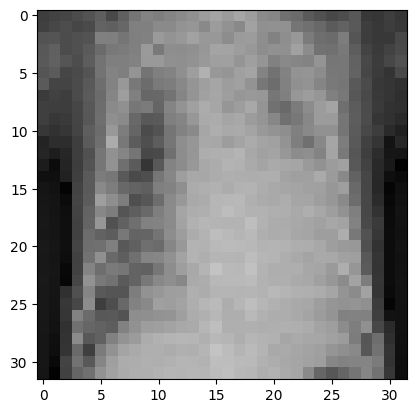

In [5]:
# to view a demo of test data

demo = next(test_data)
plt.imshow(demo[0][0])

In [6]:
# model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [7]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128,activation='relu'),

    Dropout(0.5), #50% 

    Dense(1,activation='sigmoid')
    
])

In [8]:
# to get the summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# run the model

warnings.filterwarnings('ignore')
model.fit(train_data,validation_data=val_data,verbose=1,epochs=10)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7763 - loss: 0.4957 - val_accuracy: 0.6250 - val_loss: 0.5901
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 317ms/step - accuracy: 0.8738 - loss: 0.2933 - val_accuracy: 0.6250 - val_loss: 0.7284
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 340ms/step - accuracy: 0.8995 - loss: 0.2436 - val_accuracy: 0.7500 - val_loss: 0.4077
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 337ms/step - accuracy: 0.9101 - loss: 0.2206 - val_accuracy: 0.6250 - val_loss: 0.4570
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 352ms/step - accuracy: 0.9135 - loss: 0.2095 - val_accuracy: 0.6875 - val_loss: 0.4284
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 319ms/step - accuracy: 0.9302 - loss: 0.1790 - val_accuracy: 0.8125 - val_loss: 0.3319
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 221ms/step - accuracy: 0.9273 - loss: 0.1847 - val_accuracy: 0.8750 - val_loss: 0.3295
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.9319 - loss: 0.1

In [11]:
loss, accuracy = model.evaluate(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 878ms/step - accuracy: 0.8846 - loss: 0.3140


In [12]:
print(f'The Model Accuracy is {accuracy}')

The Model Accuracy is 0.8846153616905212


In [13]:
model.save('Pneumonia_Prediction.h5')